In [2]:
import wandb
from tqdm import tqdm
import pandas as pd
import pickle
api = wandb.Api(timeout=100)



In [3]:
import json
import os
import sys
sys.path.append('/home/yhc/projects/dcd')

from envs.iphyre.adversarial import load_vlm_gen_tasks_solvable


task_suite_path = {
    "Iphyre-HandDesign-v0": "../../../iphyre/test_toy20250110/20250525/output_hand_test",
    "Iphyre-ProceduralShift-v0": "../../../iphyre/test_toy20250110/20250602/output_eval_shift",
    "Iphyre-ProceduralRotate-v0": "../../../iphyre/test_toy20250110/20250602/output_eval_rotate",
    "Iphyre-VLMGeneratedShift-v0": "../../../iphyre/test_toy20250110/20250427/output_shift",
    "Iphyre-VLMGeneratedRotate-v0": "../../../iphyre/test_toy20250110/20250427/output_rotate",
}

metrics = []

suite_metrics = {}

bad_suite_metrics = {}

for suite_name, suit_path in task_suite_path.items():
    env_names, task_dict = load_vlm_gen_tasks_solvable(
        task_dir_list=[suit_path],
        should_check_solvable=True if 'VLM' in suite_name or 'Procedural' in suite_name else False
    )

    count = 0
    for env_name in env_names:
        # print(task_dict[env_name])

        full_env_name = f'{suite_name}/{env_name}/success_rate'
        metrics.append(full_env_name)
        if suite_name not in suite_metrics:
            suite_metrics[suite_name] = []
        suite_metrics[suite_name].append(full_env_name)
        count += 1
    print(f'{suite_name} has {count} envs')

    metrics.append(f'{suite_name}/mean_success_rate')

    env_names, task_dict = load_vlm_gen_tasks_solvable(
        task_dir_list=[suit_path],
        should_check_solvable=False
    )

    bad_suite_metrics[suite_name] = env_names
    print(f'BAD {suite_name} has {len(env_names)} envs')


raw_data = {metric: {} for metric in metrics}

print(metrics)

/home/yhc/miniconda3/envs/dred/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.6.1 (SDL 2.28.4, Python 3.8.20)
Hello from the pygame community. https://www.pygame.org/contribute.html
Generated task used count: 15
Iphyre-HandDesign-v0 has 15 envs
Generated task used count: 15
BAD Iphyre-HandDesign-v0 has 15 envs
Generated task used count: 100
Iphyre-ProceduralShift-v0 has 100 envs
Generated task used count: 100
BAD Iphyre-ProceduralShift-v0 has 100 envs
Generated task used count: 100
Iphyre-ProceduralRotate-v0 has 100 envs
Generated task used count: 100
BAD Iphyre-ProceduralRotate-v0 has 100 envs
Generated task used count: 88
Iphyre-VLMGeneratedShift-v0 has 88 envs
Generated task used count: 98
BAD Iphyre-VLMGeneratedShift-v0 has 98 envs
Generated task used count: 80
Iphyre-VLMGeneratedRotate-v0 has 80 envs
Generated task used count: 98
BAD Iphyre-VLMGeneratedRotate-v0 has 98 envs
['Iphyre-HandDesign-v0/hole_double/success_rate', 'Iphyre-HandDesign-v0/hole_high_gap/success_rate', 'Iphyre-HandDesign-v0/hole_outside/success_rate', 'Iphyre-HandDesign-v0/hole

In [3]:
import os

print(f"Fetching data...")
runs = api.runs(
    path="yqkqknct/dcd", 
    filters={"config.exp_name": {"$in": ["ued_iphyre_all_reproduce_0622"]}}
)
print(f"Found {len(runs)} runs")

# Create directory for run data if it doesn't exist
os.makedirs("run_data", exist_ok=True)

# Process each run
for index, run in enumerate(runs):
    run_id = run.id
    method = run.config.get('method')

    run_file = f"run_data/{method}-{run_id}.pkl"
    
    # Skip if run data already exists
    # if os.path.exists(run_file):
    #     print(f"Skipping {run_id}, already processed")
    #     continue
        
    print(f"{index + 1} of {len(runs)} Run id {run_id} | state: {run.state} | method: {method} | name: {run.name}")
    
    # Get run data

    run_data = {
        'name': run.name,
        'method': method,
        'metrics': {}
    }
    # print(['global_step', *metrics])
    # Get history for each metric
    history = run.history(keys=['global_step', *metrics])
    # print(history)
    for m in metrics:
        run_data['metrics'][m] = history[['global_step', m]]
        
    # Save run data
    with open(run_file, 'wb') as f:
        pickle.dump(run_data, f)

        

Fetching data...
Found 51 runs
1 of 51 Run id 0yv2h09t | state: failed | method: Iphyre-DR | name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_2_20250622-052619_312
2 of 51 Run id 96wc30mn | state: failed | method: Iphyre-DR | name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_1_20250622-052619_684
3 of 51 Run id psqvn1hb | state: failed | method: Iphyre-DR | name: ued--domain_randomization-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-tl_0_20250622-052619_13
4 of 51 Run id 5xi5g4qi | state: failed | method: Iphyre-Robust-PLR | name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_0_20250622-052706_757
5 of 51 Run id 8jh6oyd8 | state: failed | method: Iphyre-Robust-PLR | name: ued--domain_randomization-noexpgrad-lr0.00025-epoch30-mb4-v0.5-gc0.5-henv0.01-ha0.01-plr0.5-rho0.5-n1000-st0.5-positive_value_loss-rank-t0.1-tl_2_20

In [4]:
import numpy as np
# Process all run data into method_dfs
method_dfs = {m: {} for m in metrics}

# Load and process all run files
for run_file in os.listdir("run_data"):
    with open(f"run_data/{run_file}", 'rb') as f:
        run_data = pickle.load(f)
        method = run_data['method']
        
        # Process each metric
        
        for m in metrics:
            if method not in method_dfs[m]:
                method_dfs[m][method] = []
            try:    
                method_dfs[m][method].append(run_data['metrics'][m])
            except:
                print(run_data['name'], run_data['method'])
                print(run_data['metrics'].keys())
            
# Calculate statistics for each method/metric
for m in metrics:
    for method, histories in method_dfs[m].items():
        # Concatenate histories from multiple runs
        method_df = pd.concat(histories, axis=0)
        # Group by step and calculate statistics 
        grouped = method_df.groupby('global_step').agg({
            m: ['mean', 'min', 'max', 'std']
        })
        # Calculate standard error
        n = len(histories)
        grouped[(m,'stderr')] = grouped[(m,'std')] / (n ** 0.5)
        # 25 quantile and 75 quantile
        # Add 25th and 75th percentiles
        grouped[(m,'25%')] = method_df.groupby('global_step')[m].quantile(0.25)
        grouped[(m,'75%')] = method_df.groupby('global_step')[m].quantile(0.75)
        method_dfs[m][method] = grouped

        
    # Save processed data for each metric
    metric_processed_filename = f'processed_data_{m.split("/")[0]}.pkl'
    with open(metric_processed_filename, 'wb') as f:
        pickle.dump(method_dfs[m], f)

print("Data downloaded and processed for methods:", list(method_dfs[metrics[0]].keys()))


Data downloaded and processed for methods: ['Iphyre-V-Uniform-10k', 'Iphyre-V-Robust-PLR-10k', 'Iphyre-Accel', 'Iphyre-V-SFL-0.3', 'Iphyre-V-Uniform', 'Iphyre-V-SFL-0.5-10k', 'Iphyre-V-SFL-0.3-10k', 'Iphyre-V-SFL-0.7-10k', 'Iphyre-V-Robust-PLR', 'Iphyre-SFL', 'Iphyre-Robust-PLR', 'Iphyre-V-SFL', 'Iphyre-V-SFL-0.9-10k', 'Iphyre-V-Accel', 'Iphyre-V-SFL-0.1-10k', 'Iphyre-DR', 'Iphyre-V-Accel-10k']


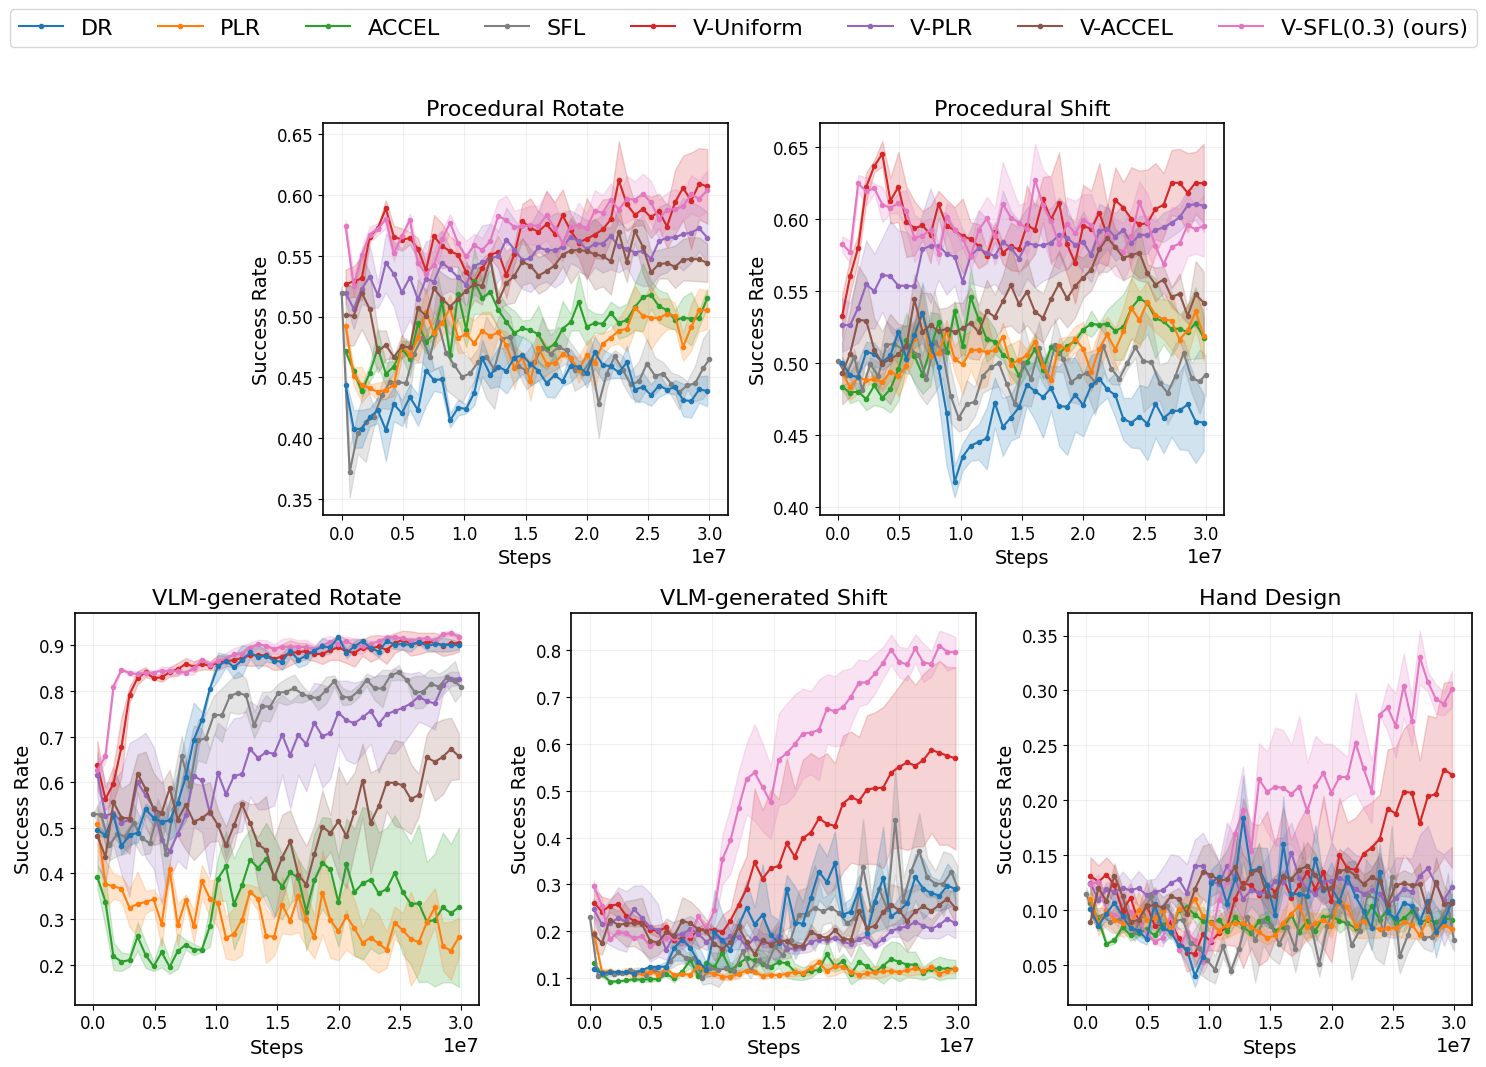

In [5]:
import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

method_display_config = {
    'Iphyre-DR': {
        'color': default_colors[0],
        'marker': 'o',
        'label': 'DR',
        'linestyle': '-',
    },
    'Iphyre-Robust-PLR': {
        'color': default_colors[1],
        'marker': 'o',
        'label': 'PLR',
        'linestyle': '-',
    },
    'Iphyre-Accel': {
        'color': default_colors[2],
        'marker': 'o',
        'label': 'ACCEL',
        'linestyle': '-',
    },
    'Iphyre-SFL': {
        'color': default_colors[7],
        'marker': 'o',
        'label': 'SFL',
        'linestyle': '-',
    },
    'Iphyre-V-Uniform-10k': {
        'color': default_colors[3],
        'marker': 'o',
        'label': 'V-Uniform',
        'linestyle': '-',
    },
    'Iphyre-V-Robust-PLR-10k': {
        'color': default_colors[4],
        'marker': 'o',
        'label': 'V-PLR',
        'linestyle': '-',
    },
    'Iphyre-V-Accel-10k': {
        'color': default_colors[5],
        'marker': 'o',
        'label': 'V-ACCEL',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.3-10k': {
        'color': default_colors[6],
        'marker': 'o',
        'label': 'V-SFL(0.3) (ours)',
        'linestyle': '-',
    },
    # 'Iphyre-V-SFL-0.5-10k': {
    #     'color': default_colors[7],
    #     'marker': 'o',
    #     'label': 'V-SFL(0.5)',
    #     'linestyle': '-',
    # }
}

# Plot rotate data (test2)
methods_to_plot = method_display_config.keys()

chart_metrics = [
    ("Iphyre-HandDesign-v0/mean_success_rate", 'Hand Design'),
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
    ("Iphyre-VLMGeneratedRotate-v0/mean_success_rate", "VLM-generated Rotate"),
    ("Iphyre-VLMGeneratedShift-v0/mean_success_rate", "VLM-generated Shift"),
]

filename = 'exp2.png'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# Create axes
ax1 = plt.subplot(gs[0, 1:3])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 3:5])  # Span last three columns in top row
ax3 = plt.subplot(gs[1, :2])  # Span first two columns in bottom row
ax4 = plt.subplot(gs[1, 2:4])  # Span middle two columns in bottom row
ax5 = plt.subplot(gs[1, 4:])  # Span last two columns in bottom row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 2

for index, (method, df) in enumerate(method_dfs[chart_metrics[1][0]].items()):
    if method in methods_to_plot:
        # Sample every 5th datapoint
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[1][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)

for spine in ax1.spines.values():
    spine.set_linewidth(1.2)

# Plot shift data (test3)
for method, df in method_dfs[chart_metrics[2][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[2][0], 'mean')]
        stderr = sampled_df[(chart_metrics[2][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[2][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)

for spine in ax2.spines.values():
    spine.set_linewidth(1.2)

# Plot test4 data
for method, df in method_dfs[chart_metrics[3][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[3][0], 'mean')]
        stderr = sampled_df[(chart_metrics[3][0], 'stderr')]
        ax3.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax3.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax3.set_xlabel('Steps', fontsize=14)
ax3.set_ylabel('Success Rate', fontsize=14)
ax3.set_title(chart_metrics[3][1], fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid(True, linestyle='-', alpha=0.2)

for spine in ax3.spines.values():
    spine.set_linewidth(1.2)

# Plot test5 data
for method, df in method_dfs[chart_metrics[4][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[4][0], 'mean')]
        stderr = sampled_df[(chart_metrics[4][0], 'stderr')]
        ax4.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax4.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax4.set_xlabel('Steps', fontsize=14)
ax4.set_ylabel('Success Rate', fontsize=14)
ax4.set_title(chart_metrics[4][1], fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.grid(True, linestyle='-', alpha=0.2)

for spine in ax4.spines.values():
    spine.set_linewidth(1.2)

# Plot test data
for method, df in method_dfs[chart_metrics[0][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[0][0], 'mean')]
        stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
        ax5.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax5.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax5.set_xlabel('Steps', fontsize=14)
ax5.set_ylabel('Success Rate', fontsize=14)
ax5.set_title(chart_metrics[0][1], fontsize=16)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax5.grid(True, linestyle='-', alpha=0.2)

for spine in ax5.spines.values():
    spine.set_linewidth(1.2)

# Add legend at the top of the figure
def find_index(array, condition):
    return next((i for i, x in enumerate(array) if condition(x)), -1)

handles, labels = ax1.get_legend_handles_labels()
# Sort handles and labels by the order in method_display_config
sorted_pairs = sorted(zip(handles, labels), key=lambda x: find_index(method_display_config.items(), lambda y: y[1]['label'] == x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)
fig.legend(sorted_handles, sorted_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()


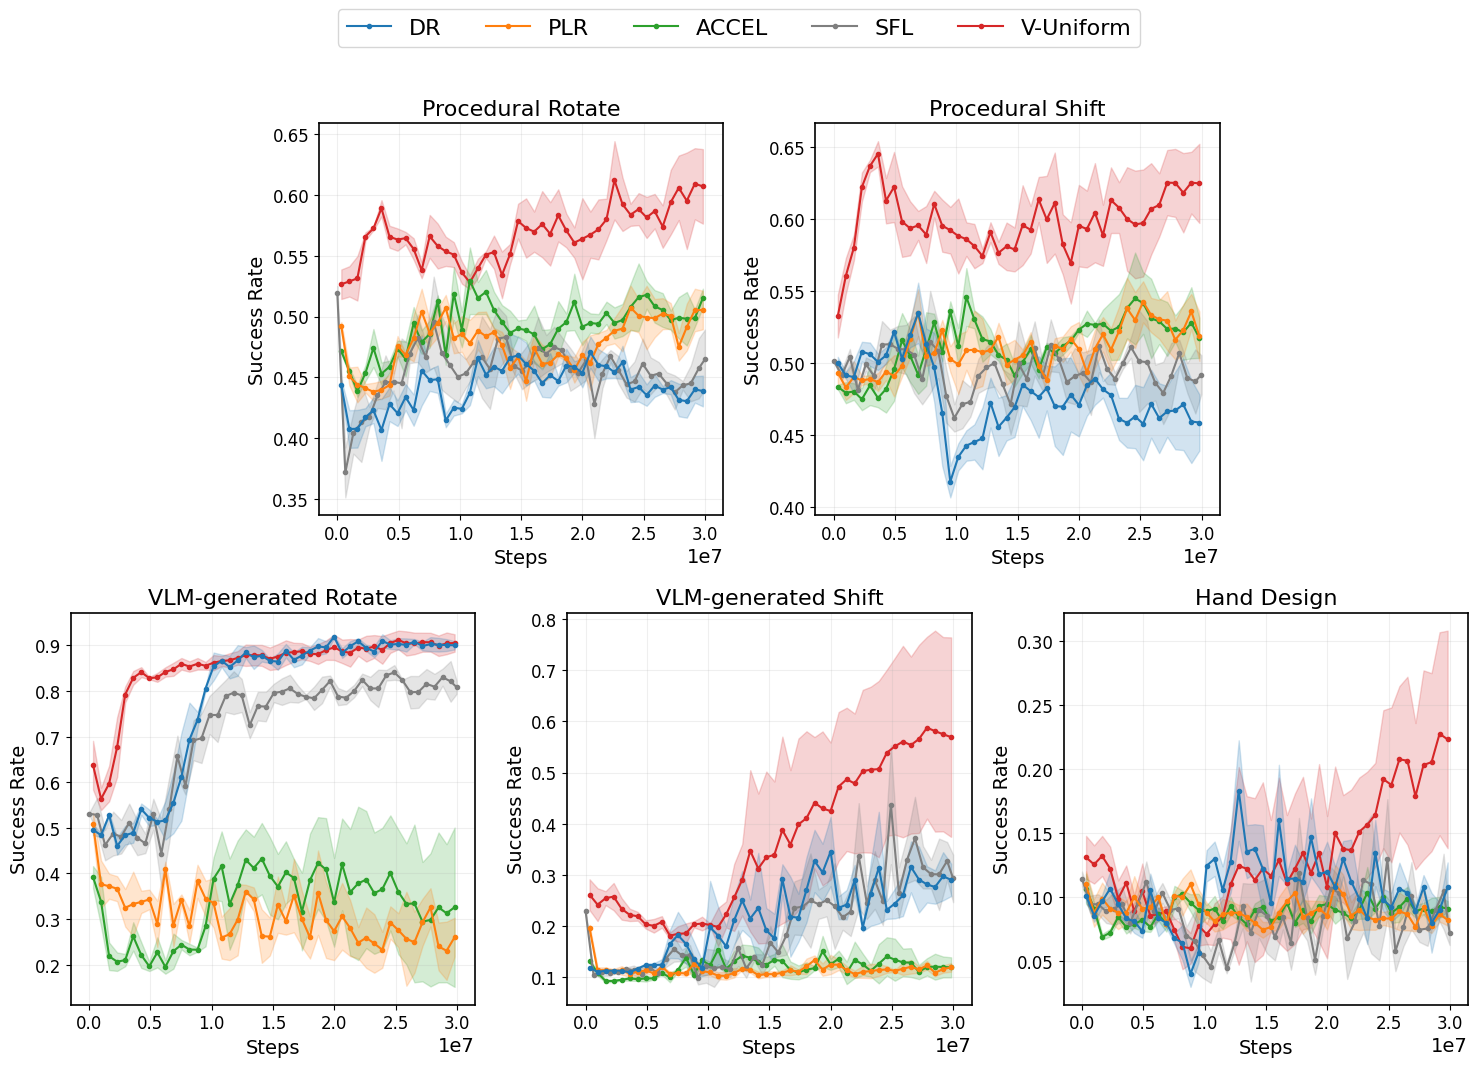

In [6]:
import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

method_display_config = {
    'Iphyre-DR': {
        'color': default_colors[0],
        'marker': 'o',
        'label': 'DR',
        'linestyle': '-',
    },
    'Iphyre-Robust-PLR': {
        'color': default_colors[1],
        'marker': 'o',
        'label': 'PLR',
        'linestyle': '-',
    },
    'Iphyre-Accel': {
        'color': default_colors[2],
        'marker': 'o',
        'label': 'ACCEL',
        'linestyle': '-',
    },
    'Iphyre-SFL': {
        'color': default_colors[7],
        'marker': 'o',
        'label': 'SFL',
        'linestyle': '-',
    },
    'Iphyre-V-Uniform-10k': {
        'color': default_colors[3],
        'marker': 'o',
        'label': 'V-Uniform',
        'linestyle': '-',
    },
    # 'Iphyre-V-Robust-PLR-10k': {
    #     'color': default_colors[4],
    #     'marker': 'o',
    #     'label': 'V-PLR',
    #     'linestyle': '-',
    # },
    # 'Iphyre-V-Accel-10k': {
    #     'color': default_colors[5],
    #     'marker': 'o',
    #     'label': 'V-ACCEL',
    #     'linestyle': '-',
    # },
    # 'Iphyre-V-SFL-0.3-10k': {
    #     'color': default_colors[6],
    #     'marker': 'o',
    #     'label': 'V-SFL(0.3) (ours)',
    #     'linestyle': '-',
    # },
    # 'Iphyre-V-SFL-0.5-10k': {
    #     'color': default_colors[7],
    #     'marker': 'o',
    #     'label': 'V-SFL(0.5)',
    #     'linestyle': '-',
    # }
}

# Plot rotate data (test2)
methods_to_plot = method_display_config.keys()

chart_metrics = [
    ("Iphyre-HandDesign-v0/mean_success_rate", 'Hand Design'),
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
    ("Iphyre-VLMGeneratedRotate-v0/mean_success_rate", "VLM-generated Rotate"),
    ("Iphyre-VLMGeneratedShift-v0/mean_success_rate", "VLM-generated Shift"),
]

filename = 'exp2.png'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# Create axes
ax1 = plt.subplot(gs[0, 1:3])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 3:5])  # Span last three columns in top row
ax3 = plt.subplot(gs[1, :2])  # Span first two columns in bottom row
ax4 = plt.subplot(gs[1, 2:4])  # Span middle two columns in bottom row
ax5 = plt.subplot(gs[1, 4:])  # Span last two columns in bottom row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 2

for index, (method, df) in enumerate(method_dfs[chart_metrics[1][0]].items()):
    if method in methods_to_plot:
        # Sample every 5th datapoint
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[1][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)

for spine in ax1.spines.values():
    spine.set_linewidth(1.2)

# Plot shift data (test3)
for method, df in method_dfs[chart_metrics[2][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[2][0], 'mean')]
        stderr = sampled_df[(chart_metrics[2][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[2][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)

for spine in ax2.spines.values():
    spine.set_linewidth(1.2)

# Plot test4 data
for method, df in method_dfs[chart_metrics[3][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[3][0], 'mean')]
        stderr = sampled_df[(chart_metrics[3][0], 'stderr')]
        ax3.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax3.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax3.set_xlabel('Steps', fontsize=14)
ax3.set_ylabel('Success Rate', fontsize=14)
ax3.set_title(chart_metrics[3][1], fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid(True, linestyle='-', alpha=0.2)

for spine in ax3.spines.values():
    spine.set_linewidth(1.2)

# Plot test5 data
for method, df in method_dfs[chart_metrics[4][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[4][0], 'mean')]
        stderr = sampled_df[(chart_metrics[4][0], 'stderr')]
        ax4.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax4.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax4.set_xlabel('Steps', fontsize=14)
ax4.set_ylabel('Success Rate', fontsize=14)
ax4.set_title(chart_metrics[4][1], fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.grid(True, linestyle='-', alpha=0.2)

for spine in ax4.spines.values():
    spine.set_linewidth(1.2)

# Plot test data
for method, df in method_dfs[chart_metrics[0][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[0][0], 'mean')]
        stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
        ax5.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax5.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax5.set_xlabel('Steps', fontsize=14)
ax5.set_ylabel('Success Rate', fontsize=14)
ax5.set_title(chart_metrics[0][1], fontsize=16)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax5.grid(True, linestyle='-', alpha=0.2)

for spine in ax5.spines.values():
    spine.set_linewidth(1.2)

# Add legend at the top of the figure
def find_index(array, condition):
    return next((i for i, x in enumerate(array) if condition(x)), -1)

handles, labels = ax1.get_legend_handles_labels()
# Sort handles and labels by the order in method_display_config
sorted_pairs = sorted(zip(handles, labels), key=lambda x: find_index(method_display_config.items(), lambda y: y[1]['label'] == x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)
fig.legend(sorted_handles, sorted_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()


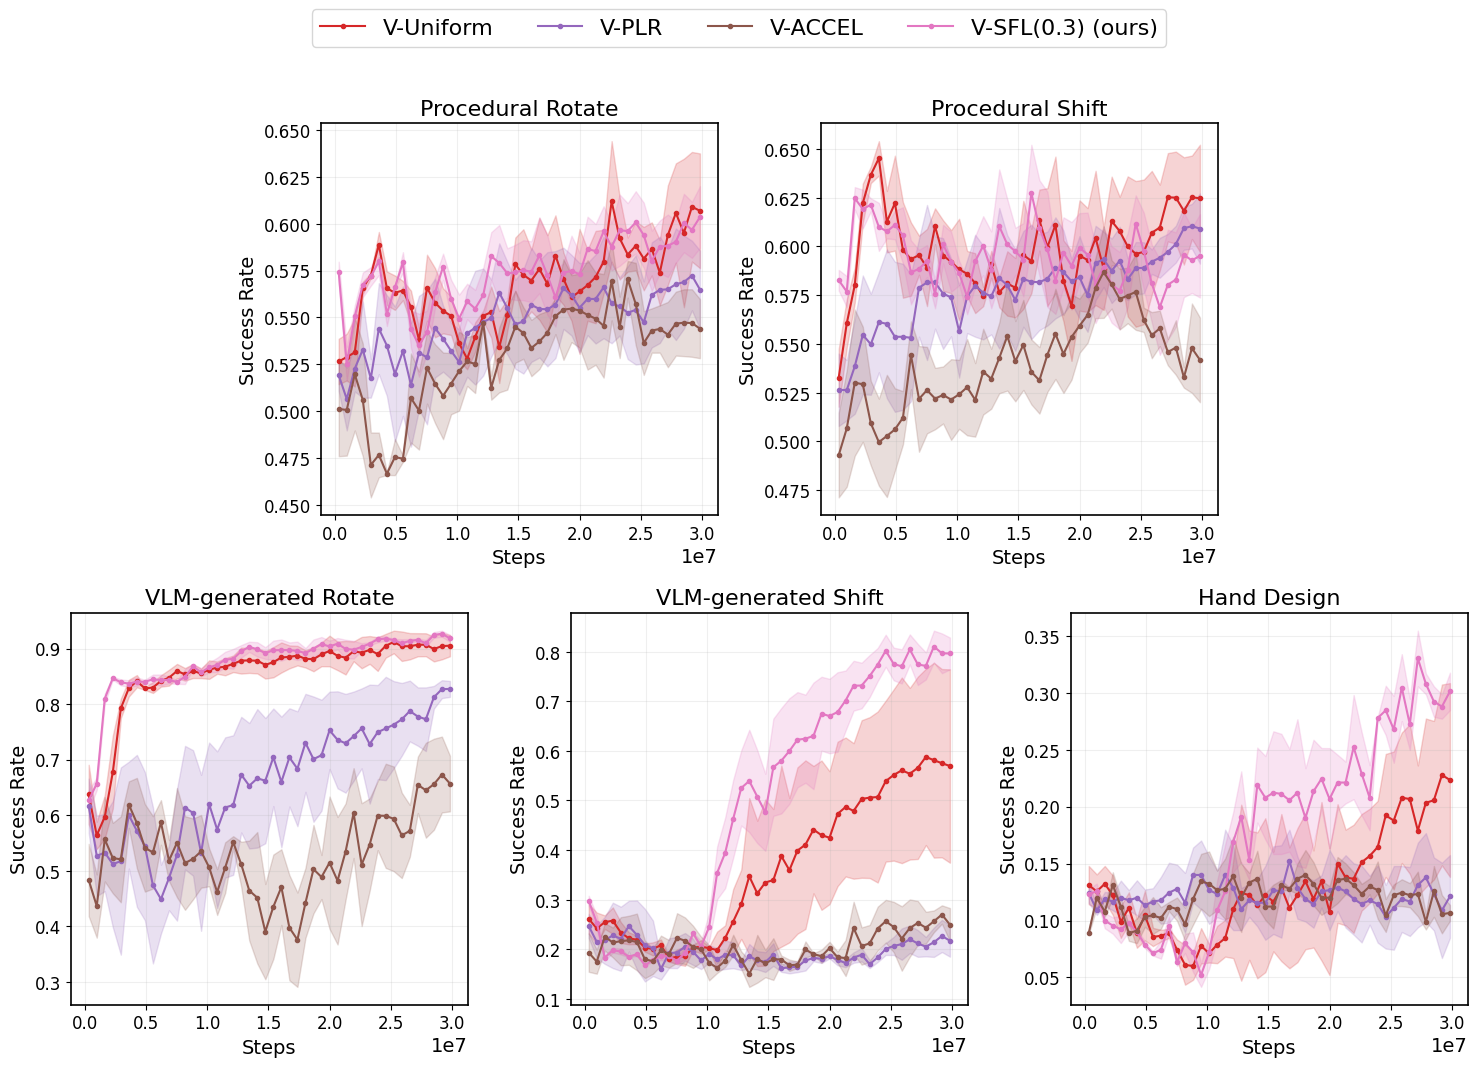

In [8]:
import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

method_display_config = {
    # 'Iphyre-DR': {
    #     'color': default_colors[0],
    #     'marker': 'o',
    #     'label': 'DR',
    #     'linestyle': '-',
    # },
    # 'Iphyre-Robust-PLR': {
    #     'color': default_colors[1],
    #     'marker': 'o',
    #     'label': 'PLR',
    #     'linestyle': '-',
    # },
    # 'Iphyre-Accel': {
    #     'color': default_colors[2],
    #     'marker': 'o',
    #     'label': 'ACCEL',
    #     'linestyle': '-',
    # },
    # 'Iphyre-SFL': {
    #     'color': default_colors[7],
    #     'marker': 'o',
    #     'label': 'SFL',
    #     'linestyle': '-',
    # },
    'Iphyre-V-Uniform-10k': {
        'color': default_colors[3],
        'marker': 'o',
        'label': 'V-Uniform',
        'linestyle': '-',
    },
    'Iphyre-V-Robust-PLR-10k': {
        'color': default_colors[4],
        'marker': 'o',
        'label': 'V-PLR',
        'linestyle': '-',
    },
    'Iphyre-V-Accel-10k': {
        'color': default_colors[5],
        'marker': 'o',
        'label': 'V-ACCEL',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.3-10k': {
        'color': default_colors[6],
        'marker': 'o',
        'label': 'V-SFL(0.3) (ours)',
        'linestyle': '-',
    },
    # 'Iphyre-V-SFL-0.5-10k': {
    #     'color': default_colors[7],
    #     'marker': 'o',
    #     'label': 'V-SFL(0.5)',
    #     'linestyle': '-',
    # }
}

# Plot rotate data (test2)
methods_to_plot = method_display_config.keys()

chart_metrics = [
    ("Iphyre-HandDesign-v0/mean_success_rate", 'Hand Design'),
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
    ("Iphyre-VLMGeneratedRotate-v0/mean_success_rate", "VLM-generated Rotate"),
    ("Iphyre-VLMGeneratedShift-v0/mean_success_rate", "VLM-generated Shift"),
]

filename = 'exp2.png'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# Create axes
ax1 = plt.subplot(gs[0, 1:3])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 3:5])  # Span last three columns in top row
ax3 = plt.subplot(gs[1, :2])  # Span first two columns in bottom row
ax4 = plt.subplot(gs[1, 2:4])  # Span middle two columns in bottom row
ax5 = plt.subplot(gs[1, 4:])  # Span last two columns in bottom row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 2

for index, (method, df) in enumerate(method_dfs[chart_metrics[1][0]].items()):
    if method in methods_to_plot:
        # Sample every 5th datapoint
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[1][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)

for spine in ax1.spines.values():
    spine.set_linewidth(1.2)

# Plot shift data (test3)
for method, df in method_dfs[chart_metrics[2][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[2][0], 'mean')]
        stderr = sampled_df[(chart_metrics[2][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[2][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)

for spine in ax2.spines.values():
    spine.set_linewidth(1.2)

# Plot test4 data
for method, df in method_dfs[chart_metrics[3][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[3][0], 'mean')]
        stderr = sampled_df[(chart_metrics[3][0], 'stderr')]
        ax3.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax3.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax3.set_xlabel('Steps', fontsize=14)
ax3.set_ylabel('Success Rate', fontsize=14)
ax3.set_title(chart_metrics[3][1], fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid(True, linestyle='-', alpha=0.2)

for spine in ax3.spines.values():
    spine.set_linewidth(1.2)

# Plot test5 data
for method, df in method_dfs[chart_metrics[4][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[4][0], 'mean')]
        stderr = sampled_df[(chart_metrics[4][0], 'stderr')]
        ax4.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax4.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax4.set_xlabel('Steps', fontsize=14)
ax4.set_ylabel('Success Rate', fontsize=14)
ax4.set_title(chart_metrics[4][1], fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.grid(True, linestyle='-', alpha=0.2)

for spine in ax4.spines.values():
    spine.set_linewidth(1.2)

# Plot test data
for method, df in method_dfs[chart_metrics[0][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[0][0], 'mean')]
        stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
        ax5.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax5.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax5.set_xlabel('Steps', fontsize=14)
ax5.set_ylabel('Success Rate', fontsize=14)
ax5.set_title(chart_metrics[0][1], fontsize=16)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax5.grid(True, linestyle='-', alpha=0.2)

for spine in ax5.spines.values():
    spine.set_linewidth(1.2)

# Add legend at the top of the figure
def find_index(array, condition):
    return next((i for i, x in enumerate(array) if condition(x)), -1)

handles, labels = ax1.get_legend_handles_labels()
# Sort handles and labels by the order in method_display_config
sorted_pairs = sorted(zip(handles, labels), key=lambda x: find_index(method_display_config.items(), lambda y: y[1]['label'] == x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)
fig.legend(sorted_handles, sorted_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()


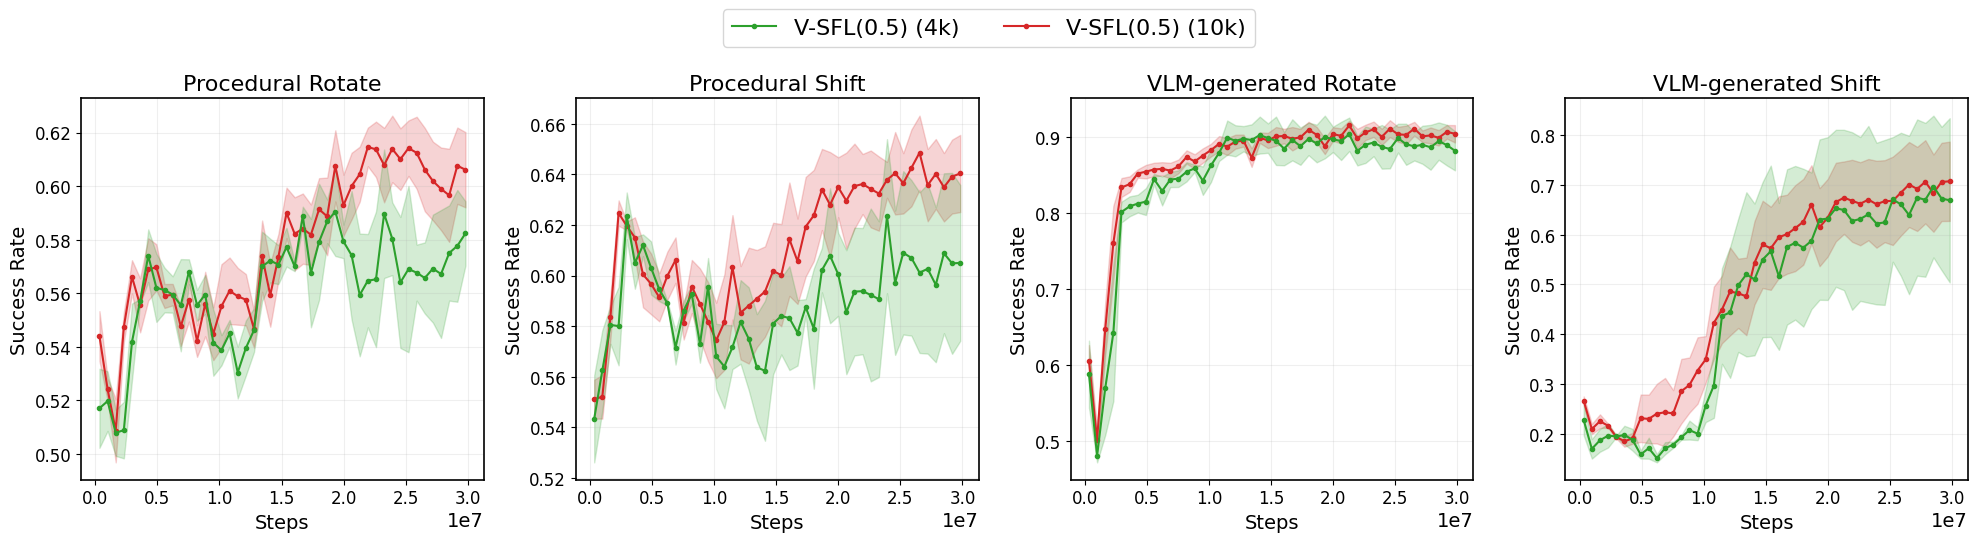

In [51]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

method_display_config = {
    # 'Iphyre-V-Uniform': {
    #     'color': default_colors[0],
    #     'marker': 'o',
    #     'label': 'V-Uniform (4k)',
    #     'linestyle': '--',
    # },
    # 'Iphyre-V-Uniform-10k': {
    #     'color': default_colors[1],
    #     'marker': 'o',
    #     'label': 'V-Uniform (10k)',
    #     'linestyle': '-',
    # },
    'Iphyre-V-SFL': {
        'color': default_colors[2],
        'marker': 'o',
        'label': 'V-SFL(0.5) (4k)',
        'linestyle': '-',
    },
    'Iphyre-V-SFL-0.5-10k': {
        'color': default_colors[3],
        'marker': 'o',
        'label': 'V-SFL(0.5) (10k)',
        'linestyle': '-',
    },
    # 'Iphyre-V-SFL-0.5-10k': {
    #     'color': default_colors[7],
    #     'marker': 'o',
    #     'label': 'V-SFL(0.5)',
    #     'linestyle': '-',
    # }
}

# Plot rotate data (test2)
methods_to_plot = method_display_config.keys()

chart_metrics = [
    ("Iphyre-HandDesign-v0/mean_success_rate", 'Hand Design'),
    ("Iphyre-ProceduralRotate-v0/mean_success_rate", "Procedural Rotate"),
    ("Iphyre-ProceduralShift-v0/mean_success_rate", "Procedural Shift"),
    ("Iphyre-VLMGeneratedRotate-v0/mean_success_rate", "VLM-generated Rotate"),
    ("Iphyre-VLMGeneratedShift-v0/mean_success_rate", "VLM-generated Shift"),
]

filename = 'exp4.png'

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure with gridspec
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 4)
# Create axes
ax1 = plt.subplot(gs[0, 0])  # Span first three columns in top row
ax2 = plt.subplot(gs[0, 1])  # Span last three columns in top row
ax3 = plt.subplot(gs[0, 2])  # Span first two columns in bottom row
ax4 = plt.subplot(gs[0, 3])  # Span middle two columns in bottom row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

gap = 2

for index, (method, df) in enumerate(method_dfs[chart_metrics[1][0]].items()):
    if method in methods_to_plot:
        # Sample every 5th datapoint
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[1][0], 'mean')]
        stderr = sampled_df[(chart_metrics[1][0], 'stderr')]
        ax1.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax1.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax1.set_xlabel('Steps', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.set_title(chart_metrics[1][1], fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(True, linestyle='-', alpha=0.2)

for spine in ax1.spines.values():
    spine.set_linewidth(1.2)

# Plot shift data (test3)
for method, df in method_dfs[chart_metrics[2][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[2][0], 'mean')]
        stderr = sampled_df[(chart_metrics[2][0], 'stderr')]
        ax2.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax2.set_xlabel('Steps', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.set_title(chart_metrics[2][1], fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='-', alpha=0.2)

for spine in ax2.spines.values():
    spine.set_linewidth(1.2)

# Plot test4 data
for method, df in method_dfs[chart_metrics[3][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[3][0], 'mean')]
        stderr = sampled_df[(chart_metrics[3][0], 'stderr')]
        ax3.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax3.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax3.set_xlabel('Steps', fontsize=14)
ax3.set_ylabel('Success Rate', fontsize=14)
ax3.set_title(chart_metrics[3][1], fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.grid(True, linestyle='-', alpha=0.2)

for spine in ax3.spines.values():
    spine.set_linewidth(1.2)

# Plot test5 data
for method, df in method_dfs[chart_metrics[4][0]].items():
    if method in methods_to_plot:
        sampled_df = df.iloc[::gap]
        mean = sampled_df[(chart_metrics[4][0], 'mean')]
        stderr = sampled_df[(chart_metrics[4][0], 'stderr')]
        ax4.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
        ax4.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
ax4.set_xlabel('Steps', fontsize=14)
ax4.set_ylabel('Success Rate', fontsize=14)
ax4.set_title(chart_metrics[4][1], fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.grid(True, linestyle='-', alpha=0.2)

for spine in ax4.spines.values():
    spine.set_linewidth(1.2)

# Plot test data
# for method, df in method_dfs[chart_metrics[0][0]].items():
#     if method in methods_to_plot:
#         sampled_df = df.iloc[::gap]
#         mean = sampled_df[(chart_metrics[0][0], 'mean')]
#         stderr = sampled_df[(chart_metrics[0][0], 'stderr')]
#         ax5.plot(sampled_df.index, mean, label=method_display_config[method]['label'], marker='o', markersize=3, color=method_display_config[method]['color'], linestyle=method_display_config[method]['linestyle'])
#         ax5.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2, color=method_display_config[method]['color'])
# ax5.set_xlabel('Steps', fontsize=14)
# ax5.set_ylabel('Success Rate', fontsize=14)
# ax5.set_title(chart_metrics[0][1], fontsize=16)
# ax5.tick_params(axis='both', which='major', labelsize=12)
# ax5.grid(True, linestyle='-', alpha=0.2)

# for spine in ax5.spines.values():
#     spine.set_linewidth(1.2)

# Add legend at the top of the figure
def find_index(array, condition):
    return next((i for i, x in enumerate(array) if condition(x)), -1)

handles, labels = ax1.get_legend_handles_labels()
# Sort handles and labels by the order in method_display_config
sorted_pairs = sorted(zip(handles, labels), key=lambda x: find_index(method_display_config.items(), lambda y: y[1]['label'] == x[1]))
sorted_handles, sorted_labels = zip(*sorted_pairs)
fig.legend(sorted_handles, sorted_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=78, fontsize=16)

plt.tight_layout()
if filename:
    plt.savefig(filename, dpi=100, bbox_inches='tight')
plt.show()


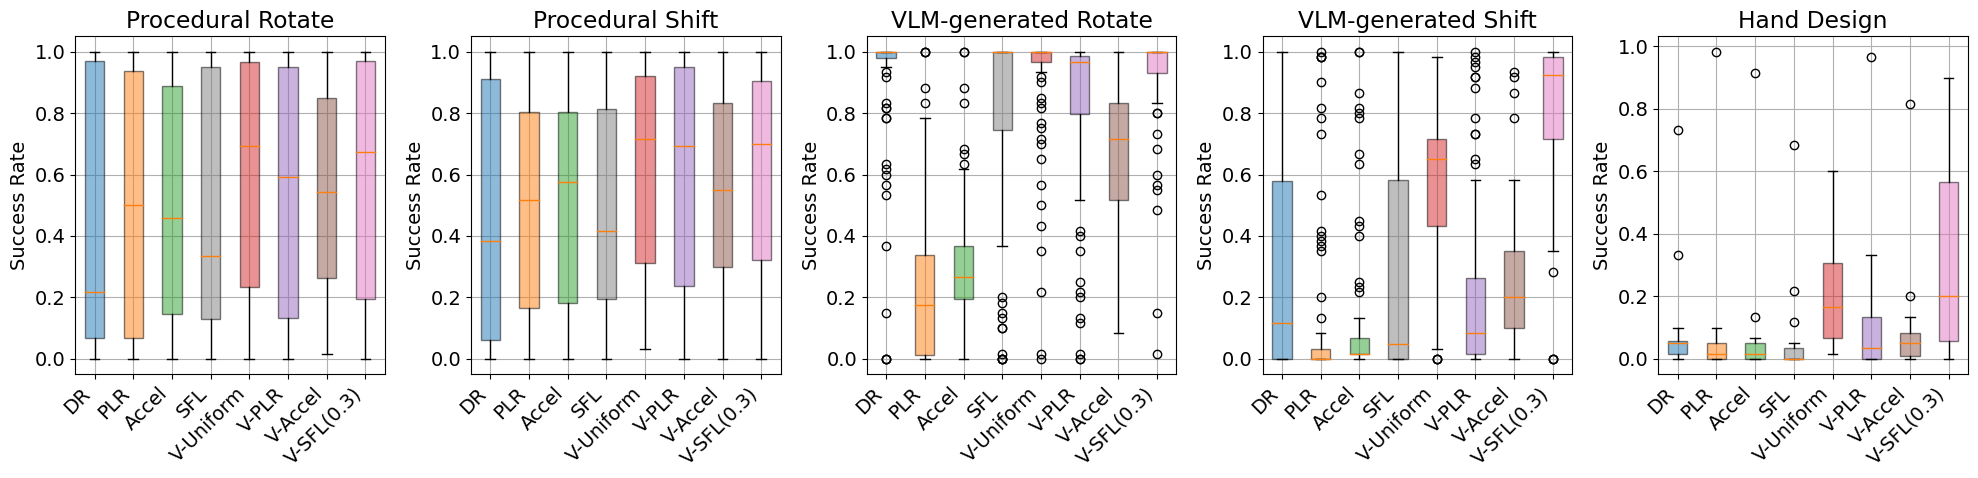

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 5)
ax1 = plt.subplot(gs[0, 0])  # First subplot
ax2 = plt.subplot(gs[0, 1])  # Second subplot
ax3 = plt.subplot(gs[0, 2])  # Third subplot
ax4 = plt.subplot(gs[0, 3])  # Fourth subplot
ax5 = plt.subplot(gs[0, 4])  # Fifth subplot
axes = np.array([ax1, ax2, ax3, ax4, ax5]).ravel()



# Create figure with gridspec
# fig = plt.figure(figsize=(15, 10))
# gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1])
# # Create axes
# ax1 = plt.subplot(gs[0, 1:3])  # Span first three columns in top row
# ax2 = plt.subplot(gs[0, 3:5])  # Span last three columns in top row
# ax3 = plt.subplot(gs[1, :2])  # Span first two columns in bottom row
# ax4 = plt.subplot(gs[1, 2:4])  # Span middle two columns in bottom row
# ax5 = plt.subplot(gs[1, 4:])  # Span last two columns in bottom row

plt.rcParams.update({'font.size': 14})  # Increase overall font size

algorithms = {
    'Iphyre-DR': {'label': 'DR', 'color': 'C0'},
    'Iphyre-Robust-PLR': {'label': 'PLR', 'color': 'C1'}, 
    'Iphyre-Accel': {'label': 'Accel', 'color': 'C2'},
    'Iphyre-SFL': {'label': 'SFL', 'color': 'C7'},
    'Iphyre-V-Uniform-10k': {'label': 'V-Uniform', 'color': 'C3'},
    'Iphyre-V-Robust-PLR-10k': {'label': 'V-PLR', 'color': 'C4'},
    'Iphyre-V-Accel-10k': {'label': 'V-Accel', 'color': 'C5'},
    'Iphyre-V-SFL-0.3-10k': {'label': 'V-SFL(0.3)', 'color': 'C6'}
}
round_index = -1

suites = {
    'Iphyre-ProceduralRotate-v0': 'Procedural Rotate', 
    'Iphyre-ProceduralShift-v0': 'Procedural Shift',
    'Iphyre-VLMGeneratedRotate-v0': 'VLM-generated Rotate',
    'Iphyre-VLMGeneratedShift-v0': 'VLM-generated Shift',
    'Iphyre-HandDesign-v0': 'Hand Design',
    
}

for suite_idx, (suite, suite_name) in enumerate(suites.items()):
    all_success_rates = []
    for algorithm in algorithms:
        last_step_success_rates = []
        for metric in suite_metrics[suite]:
            last_step_success_rates.append(method_dfs[metric][algorithm].iloc[round_index][(metric, 'mean')])
        all_success_rates.append(last_step_success_rates)

    bp = axes[suite_idx].boxplot(all_success_rates, 
                                labels=[algorithms[alg]['label'] for alg in algorithms], 
                                patch_artist=True)
    
    # Customize boxplot colors
    for patch, alg in zip(bp['boxes'], algorithms.values()):
        patch.set_facecolor(alg['color'])
        patch.set_alpha(0.5)

    axes[suite_idx].set_ylabel('Success Rate')
    axes[suite_idx].set_title(f'{suite_name}')
    axes[suite_idx].grid(True)
    plt.setp(axes[suite_idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Data downloaded and processed for methods: ['Iphyre-V-Uniform-10k', 'Iphyre-V-Robust-PLR-10k', 'Iphyre-Accel', 'Iphyre-V-SFL-0.3', 'Iphyre-V-Uniform', 'Iphyre-V-SFL-0.3-10k', 'Iphyre-V-Robust-PLR', 'Iphyre-V-SFL-0.5-10k', 'Iphyre-Robust-PLR', 'Iphyre-V-SFL', 'Iphyre-V-Accel', 'Iphyre-DR', 'Iphyre-V-Accel-10k']


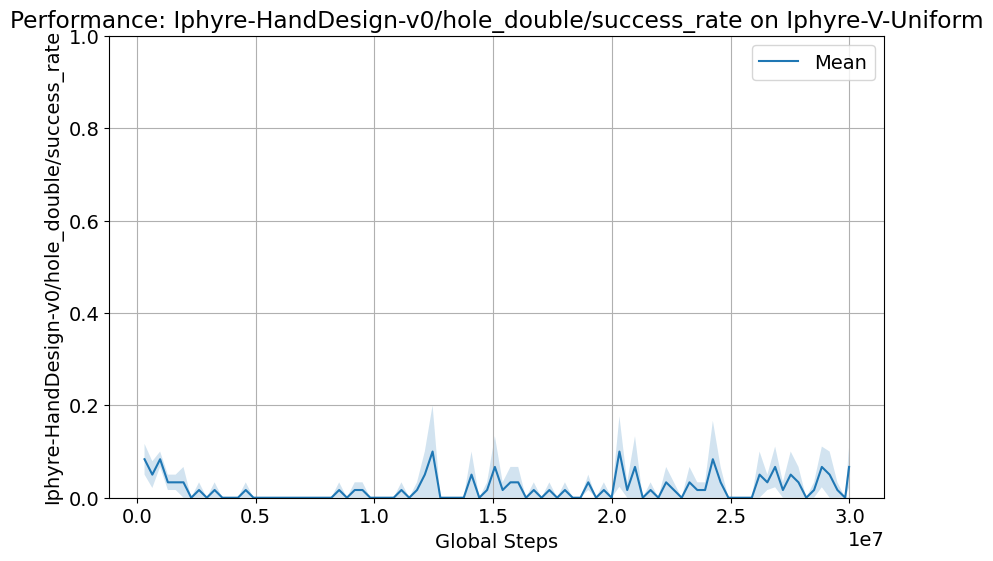

Iphyre-HandDesign-v0/hole_double/success_rate


In [13]:
# Show a single plot

# Create line plot using matplotlib
import matplotlib.pyplot as plt


algorithm = 'Iphyre-V-Uniform'

# algorithm = 'Iphyre-DR'

current_metric = metrics[0]

df = method_dfs[current_metric][algorithm]
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[(current_metric, 'mean')], label='Mean')
plt.fill_between(df.index, 
                 df[(current_metric, 'mean')] - df[(current_metric, 'stderr')],
                 df[(current_metric, 'mean')] + df[(current_metric, 'stderr')],
                 alpha=0.2)
plt.xlabel('Global Steps')
plt.ylabel(current_metric)
plt.ylim(0, 1)
plt.title(f'Performance: {current_metric} on {algorithm}')
plt.grid(True)
plt.legend()
plt.show()

print(current_metric)

Iphyre-DR mean: 0.45966666666666667
Iphyre-V-Uniform mean: 0.5948333333333333
Iphyre-Robust-PLR mean: 0.5196666666666666
Iphyre-V-Robust-PLR mean: 0.6578333333333335
Iphyre-Accel mean: 0.5235
Iphyre-V-Accel mean: 0.5648333333333333
Iphyre-V-SFL mean: 0.5958333333333333


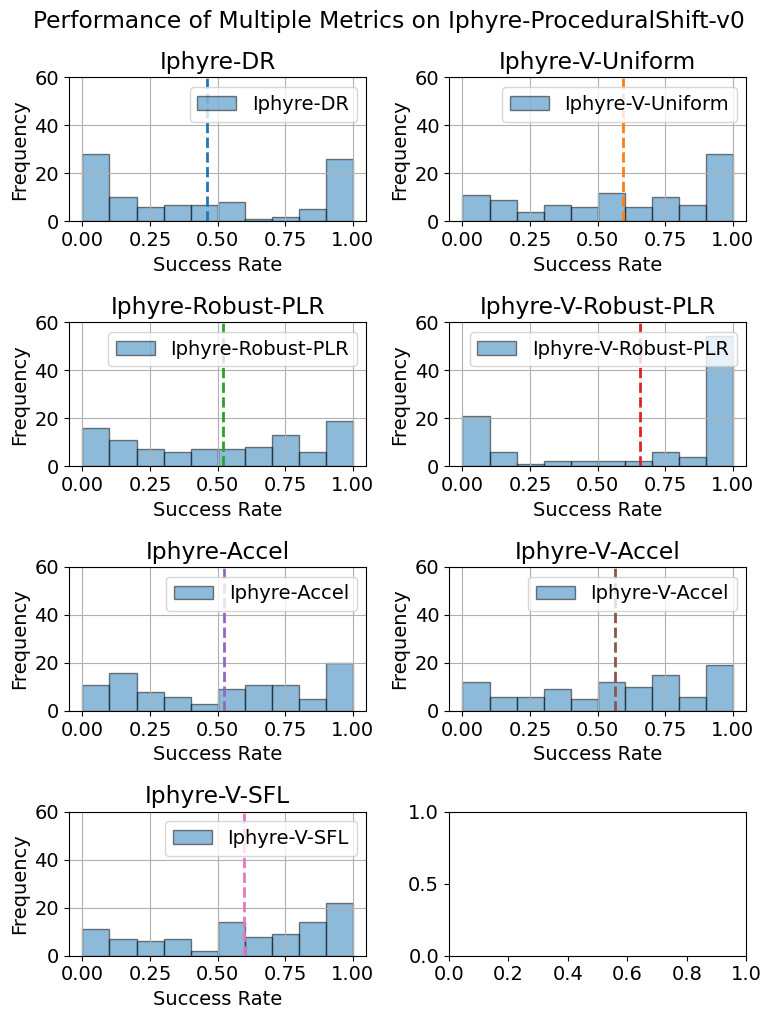

In [17]:
import numpy as np

fig, axes = plt.subplots(4, 2, figsize=(8, 10))
axes = axes.ravel()

algorithms = ['Iphyre-DR', 'Iphyre-V-Uniform', 
               'Iphyre-Robust-PLR', 'Iphyre-V-Robust-PLR', 
               'Iphyre-Accel', 'Iphyre-V-Accel',
               'Iphyre-V-SFL', ]
round_index = -1


suite = 'Iphyre-ProceduralShift-v0'

for i, algorithm in enumerate(algorithms):
    last_step_success_rates = []
    for metric in suite_metrics[suite]:
        last_step_success_rates.append(method_dfs[metric][algorithm].iloc[round_index][(metric, 'mean')])
    
    mean = np.mean(last_step_success_rates)
    print(f'{algorithm} mean:', mean)
    
    axes[i].hist(last_step_success_rates, bins=10, edgecolor='black', alpha=0.5, label=algorithm)
    axes[i].axvline(mean, color=f'C{i}', linestyle='dashed', linewidth=2)
    axes[i].set_xlabel('Success Rate')
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(0, 60)
    axes[i].set_title(algorithm)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.suptitle(f'Performance of Multiple Metrics on {suite}', y=1.02)
plt.show()


# Data downloaded and processed for methods: ['Iphyre-V-Uniform-10k', 'Iphyre-V-Robust-PLR-10k', 'Iphyre-Accel', 'Iphyre-V-SFL-0.3', 'Iphyre-V-Uniform', 'Iphyre-V-SFL-0.3-10k', 'Iphyre-V-Robust-PLR', 'Iphyre-V-SFL-0.5-10k', 'Iphyre-Robust-PLR', 'Iphyre-V-SFL', 'Iphyre-V-Accel', 'Iphyre-DR', 'Iphyre-V-Accel-10k']



In [67]:
metric = metrics[0]
algorithm = 'Iphyre-DR'
method_dfs[metric][algorithm]

Iphyre-ProceduralShift-v0/20250602_231139_game_20/success_rate  \
                                                                      mean   
global_step                                                                  
327680.0                                              0.000000               
655360.0                                              0.000000               
983040.0                                              0.000000               
1310720.0                                             0.000000               
1638400.0                                             0.000000               
...                                                        ...               
28835840.0                                            0.033333               
29163520.0                                            0.050000               
29491200.0                                            0.016667               
29818880.0                                            0.016667               
29982720.0                                            0.016667               

                                            
             min   max       std    stderr  
global_step                                 
327680.0     0.0  0.00  0.000000  0.000000  
655360.0     0.0  0.00  0.000000  0.000000  
983040.0     0.0  0.00  0.000000  0.000000  
1310720.0    0.0  0.00  0.000000  0.000000  
1638400.0    0.0  0.00  0.000000  0.000000  
...          ...   ...       ...       ...  
28835840.0   0.0  0.10  0.057735  0.033333  
29163520.0   0.0  0.15  0.086603  0.050000  
29491200.0   0.0  0.05  0.028868  0.016667  
29818880.0   0.0  0.05  0.028868  0.016667  
29982720.0   0.0  0.05  0.028868  0.016667  

[92 rows x 5 columns]

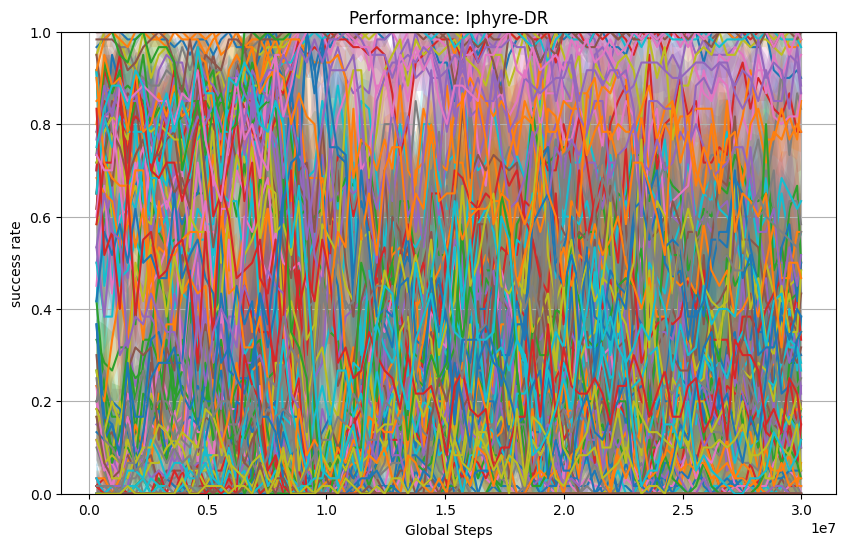

In [72]:
# Show a single plot

# Create line plot using matplotlib
import matplotlib.pyplot as plt


algorithm = 'Iphyre-V-Uniform'

algorithm = 'Iphyre-DR'


plt.figure(figsize=(10, 6))



for metric in metrics:
    df = method_dfs[metric][algorithm]
    plt.plot(df.index, df[(metric, 'mean')], label=metric)
    plt.fill_between(df.index, 
                    df[(metric, 'mean')] - df[(metric, 'stderr')],
                    df[(metric, 'mean')] + df[(metric, 'stderr')],
                    alpha=0.2)
plt.xlabel('Global Steps')
plt.ylabel('success rate')
plt.ylim(0, 1)
plt.title(f'Performance: {algorithm}')
plt.grid(True)
# plt.legend()
plt.show()

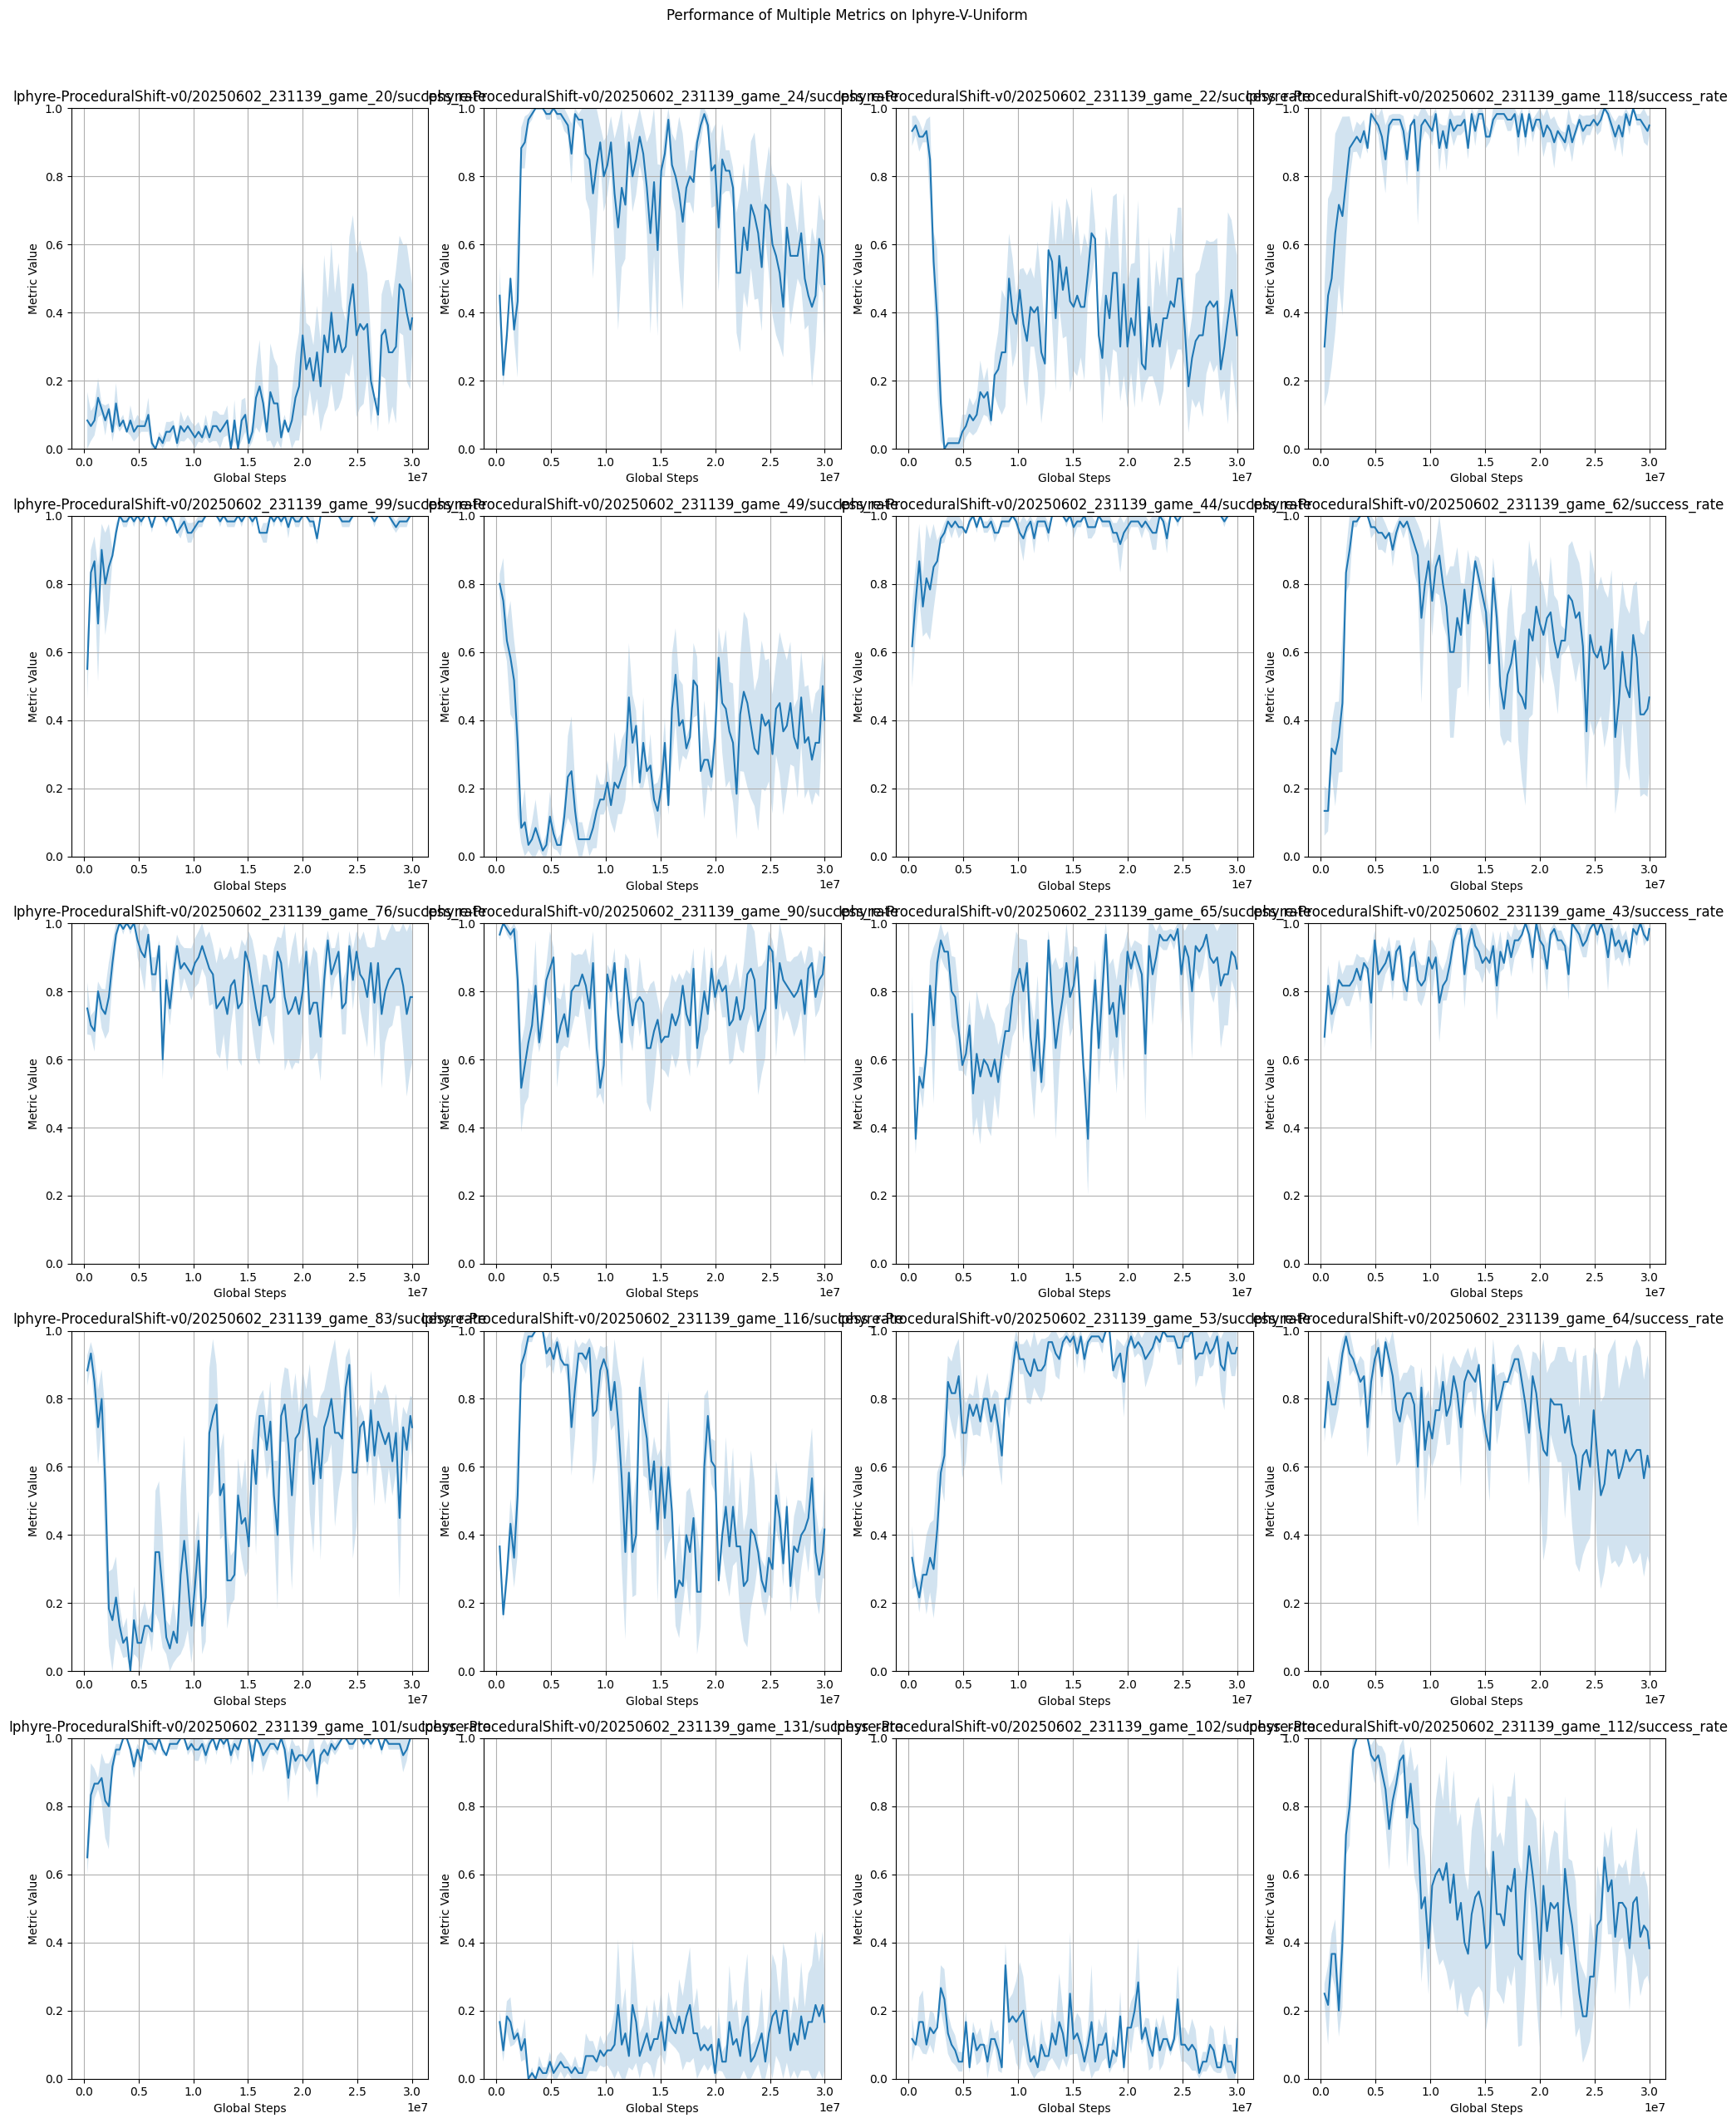

In [76]:
# Show multiple plots in a grid

# Create line plots using matplotlib
import matplotlib.pyplot as plt

algorithm = 'Iphyre-V-Uniform'

# algorithm = 'Iphyre-DR'

fig, axs = plt.subplots(5, 4, figsize=(20, 25))
axs = axs.ravel()

for i, current_metric in enumerate(metrics[:20]):
    df = method_dfs[current_metric][algorithm]
    axs[i].plot(df.index, df[(current_metric, 'mean')], label=current_metric)
    axs[i].fill_between(df.index,
                     df[(current_metric, 'mean')] - df[(current_metric, 'stderr')],
                     df[(current_metric, 'mean')] + df[(current_metric, 'stderr')],
                     alpha=0.2)
    axs[i].set_xlabel('Global Steps')
    axs[i].set_ylabel('Metric Value')
    axs[i].set_ylim(0, 1)
    axs[i].set_title(current_metric)
    axs[i].grid(True)

plt.suptitle(f'Performance of Multiple Metrics on {algorithm}', y=1.02)
plt.tight_layout()
plt.show()

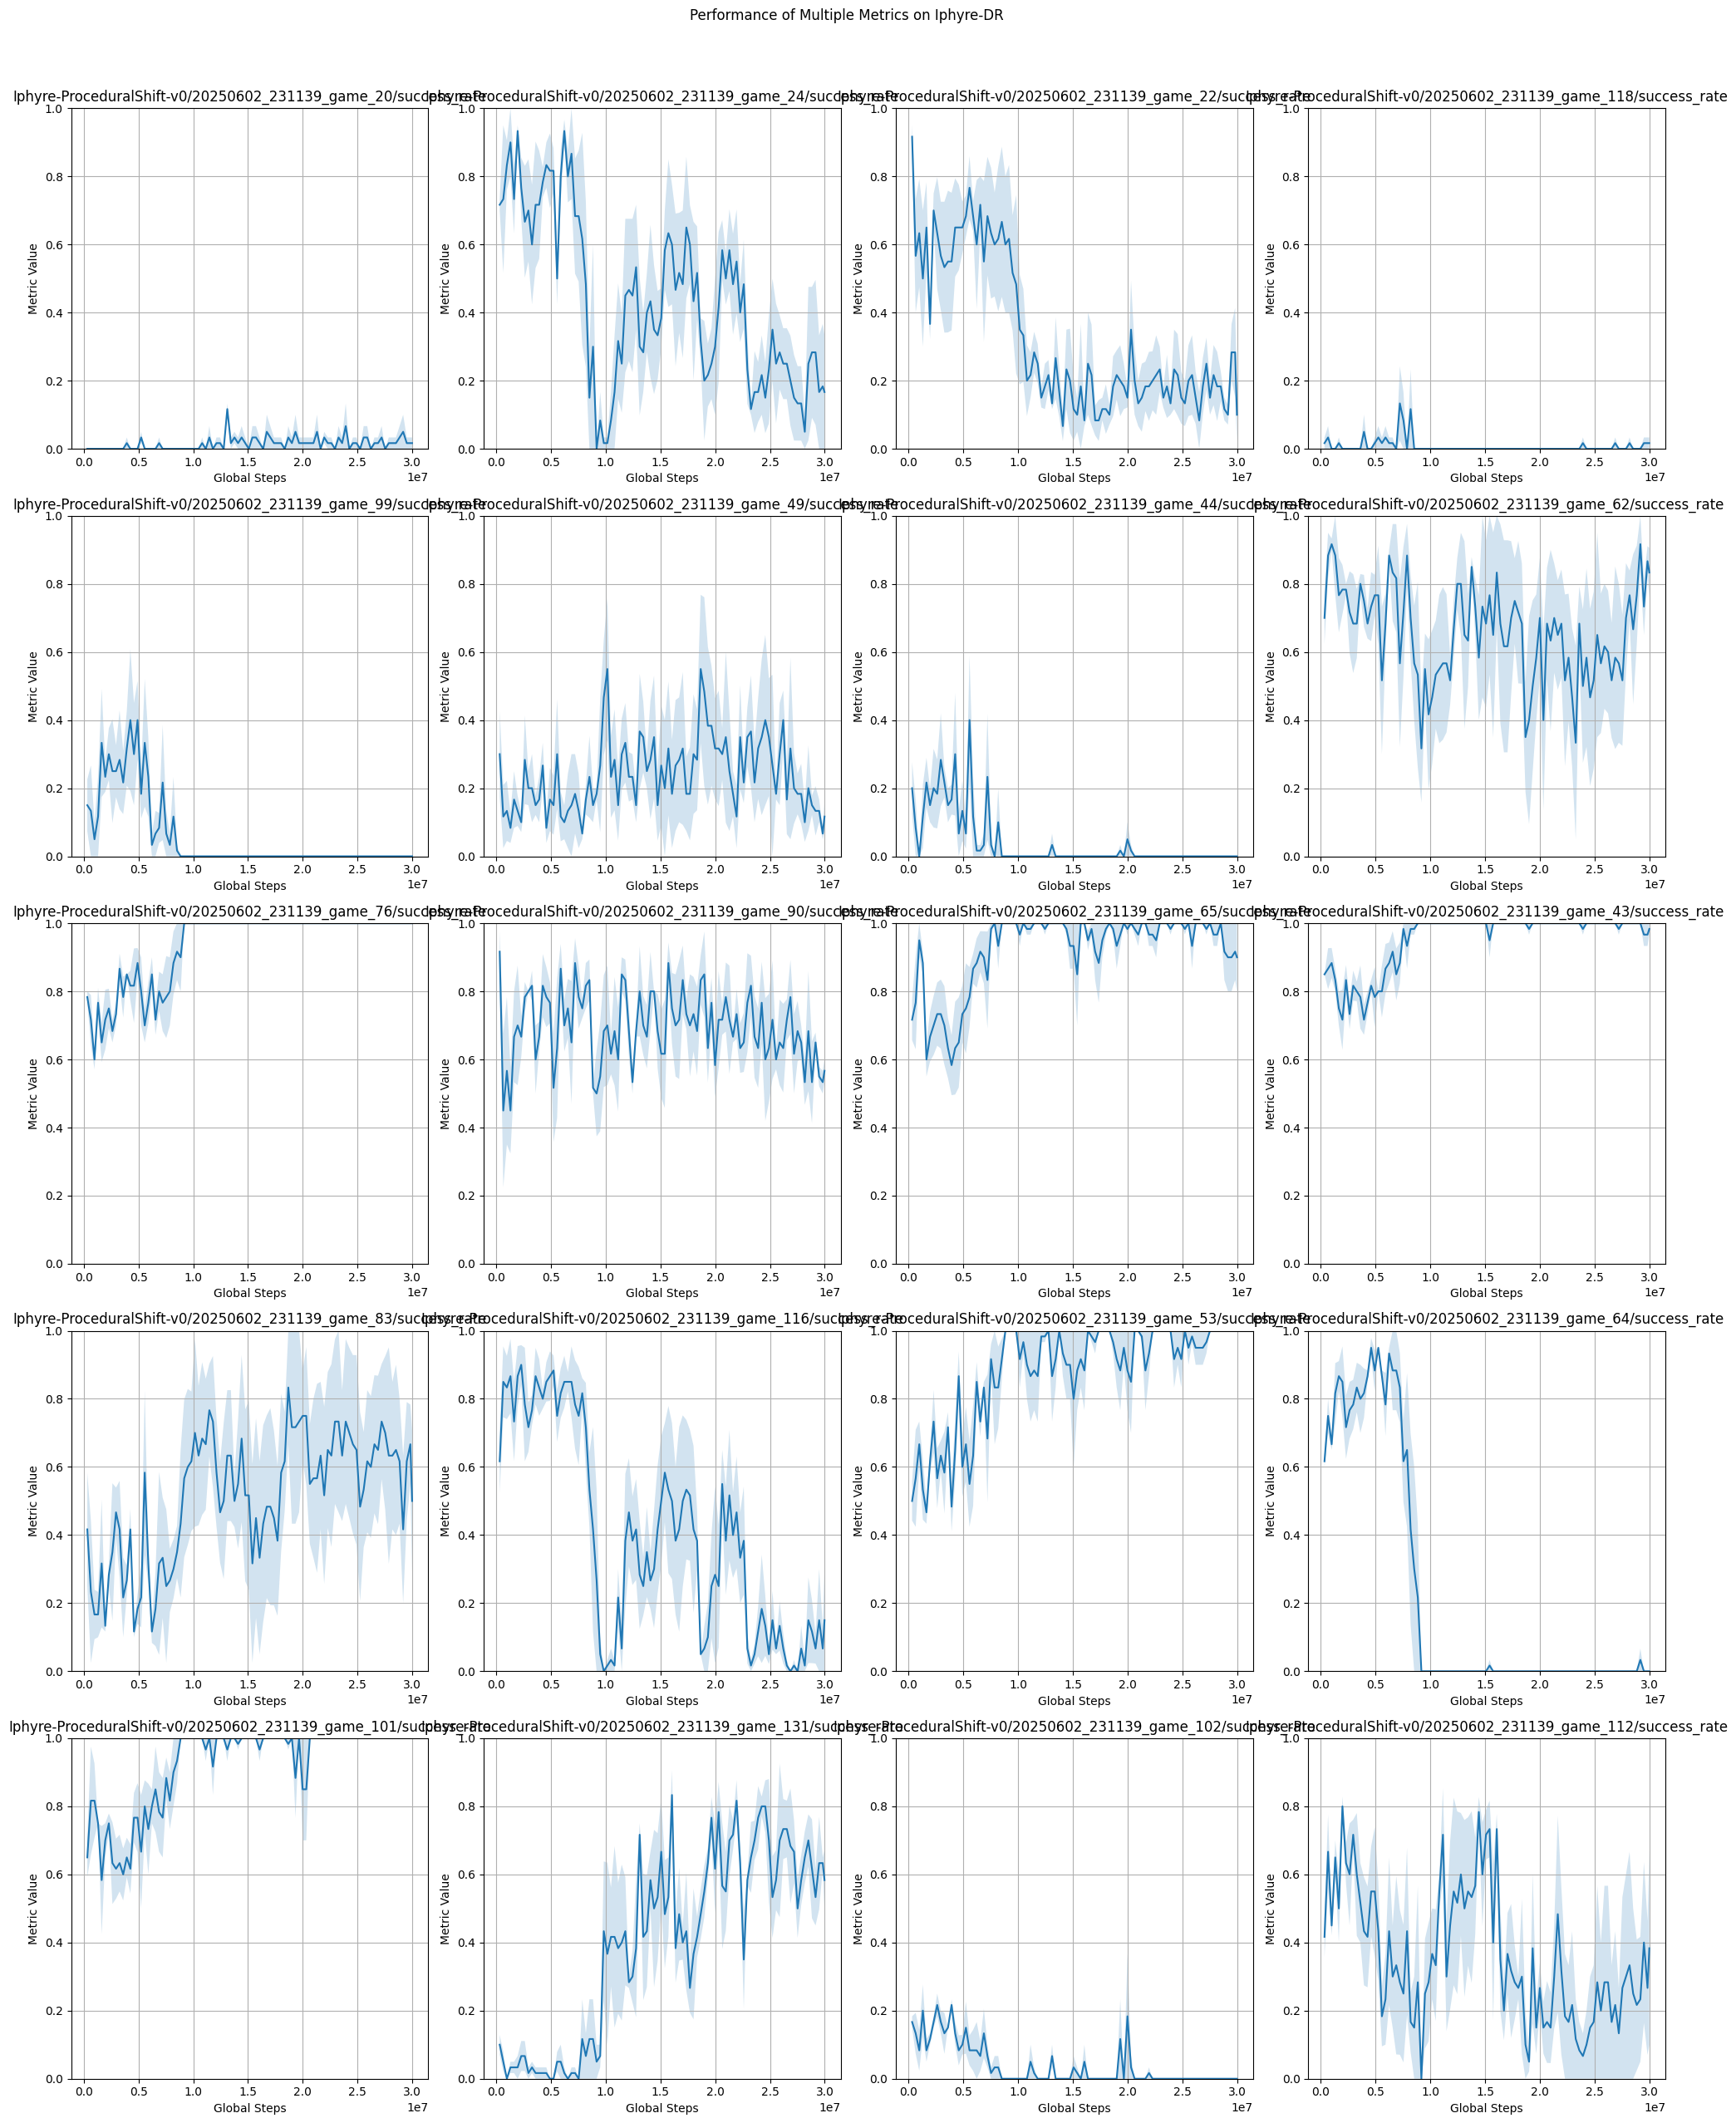

In [79]:
# Show multiple plots in a grid

# Create line plots using matplotlib
import matplotlib.pyplot as plt

algorithm = 'Iphyre-DR'

# algorithm = 'Iphyre-DR'

fig, axs = plt.subplots(5, 4, figsize=(20, 25))
axs = axs.ravel()

for i, current_metric in enumerate(metrics[:20]):
    df = method_dfs[current_metric][algorithm]
    axs[i].plot(df.index, df[(current_metric, 'mean')], label=current_metric)
    axs[i].fill_between(df.index,
                     df[(current_metric, 'mean')] - df[(current_metric, 'stderr')],
                     df[(current_metric, 'mean')] + df[(current_metric, 'stderr')],
                     alpha=0.2)
    axs[i].set_xlabel('Global Steps')
    axs[i].set_ylabel('Metric Value')
    axs[i].set_ylim(0, 1)
    axs[i].set_title(current_metric)
    axs[i].grid(True)

plt.suptitle(f'Performance of Multiple Metrics on {algorithm}', y=1.02)
plt.tight_layout()
plt.show()

['Iphyre-ProceduralRotate-v0/20250602_230753_game_44/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_65/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_73/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_3/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_24/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_61/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_124/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_29/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_63/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_48/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_100/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_69/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_31/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_121/success_rate', 'Iphyre-ProceduralRotate-v0/20250602_230753_game_41/success

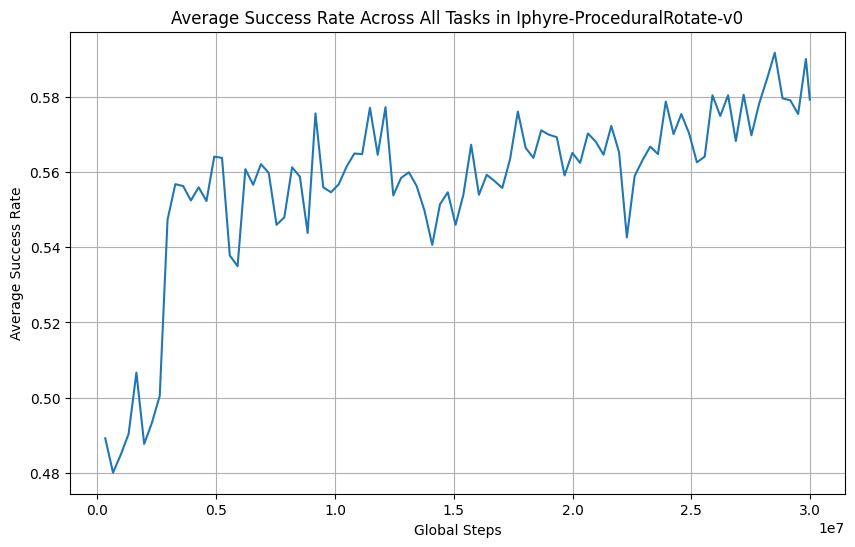

In [163]:
# Plot shift data (test3)

algorithm = 'Iphyre-V-Uniform'
# suite = 'Iphyre-ProceduralShift-v0'
suite = 'Iphyre-ProceduralRotate-v0'

# Calculate average success rate across all metrics in the suite
metrics_to_avg = suite_metrics[suite]
# metrics_to_avg = bad_suite_metrics[suite]

print(metrics_to_avg)

# Create figure
plt.figure(figsize=(10, 6))

# For each method, calculate and plot the average
for method in method_dfs[metrics_to_avg[0]].keys():
    if method == algorithm:
        # Get data for all metrics
        all_means = []
        all_stderr = []
        for metric in metrics_to_avg:
            df = method_dfs[metric][method]
            all_means.append(df[(metric, 'mean')])
            all_stderr.append(df[(metric, 'stderr')])
        
        # Calculate average across metrics
        mean_series = pd.concat(all_means, axis=1).mean(axis=1)
        # stderr_series = pd.concat(all_stderr, axis=1).mean(axis=1)
        
        # Plot
        plt.plot(df.index, mean_series, label=f'Average Success Rate')
        # plt.fill_between(df.index, 
        #                 mean_series - stderr_series,
        #                 mean_series + stderr_series,
        #                 alpha=0.2)



plt.xlabel('Global Steps')
plt.ylabel('Average Success Rate')
plt.title(f'Average Success Rate Across All Tasks in {suite}')
plt.grid(True)
plt.show()



# for method, df in method_dfs['test3/success_rate'].items():
#     if method in methods_to_plot:
#         sampled_df = df.iloc[::gap]
#         mean = sampled_df[('test3/success_rate', 'mean')]
#         stderr = sampled_df[('test3/success_rate', 'stderr')]
#         ax2.plot(sampled_df.index, mean, label=method_display_names[method], marker='o', markersize=3)
#         ax2.fill_between(sampled_df.index, mean - stderr, mean + stderr, alpha=0.2)
# ax2.set_xlabel('Steps', fontsize=14)
# ax2.set_ylabel('Success Rate', fontsize=14)
# ax2.set_title('Procedural Shift', fontsize=16)
# ax2.tick_params(axis='both', which='major', labelsize=12)
# ax2.grid(True, linestyle='-', alpha=0.2)

# for spine in ax2.spines.values():
#     spine.set_linewidth(1.2)